# DATAQUEST - Visualizing Geographic Data
Data Scientist in Python Path<br>
Data Analysis and Visualization<br>
Storytelling Through Data Visualization<br>

## 1. Geographic Data

In [1]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

print(airports.iloc[0])
print(airlines.iloc[0])
print(routes.iloc[0])

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


## 4. Workflow With Cartopy

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})

Use the subplot_kw argument to pass the projection attribute for all axes created.<br>
__[matplotlib.pyplot.subplots API documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)__

## 5. Converting From Spherical to Cartesian Coordinates

In [3]:
xyz_array = ccrs.Mercator().transform_points(ccrs.Geodetic(),airports["longitude"].values, airports["latitude"].values)
x,y = xyz_array[:,0], xyz_array[:,1]

Not really needed with Cartopy since coordinate transformation can be handled during the mapping process using the transform attribute.

## 6. Generating A Scatter Plot

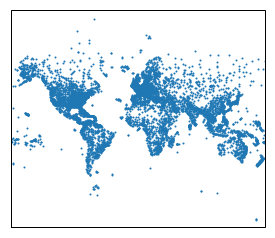

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.scatter(x, y, s=1)
plt.show()

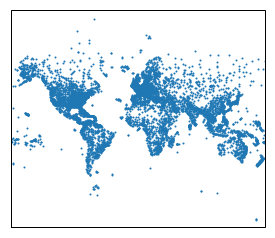

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=1)
plt.show()

Better alternative performing the transformation as part of the mapping process.

## 7. Customizing The Plot Using Basemap

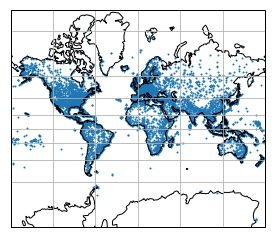

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=1)
ax.coastlines()
ax.gridlines()
plt.show()

Can also add gridlines.

## 8. Customizing The Plot Using Matplotlib

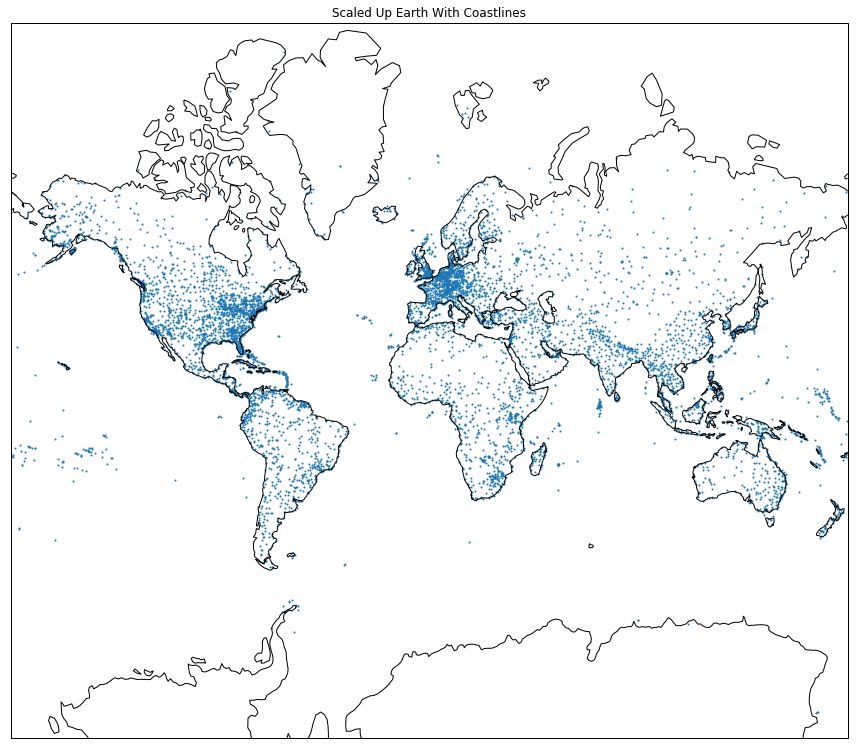

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
fig.set_size_inches(15,20)
ax.set_title("Scaled Up Earth With Coastlines")
ax.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=1)
ax.coastlines()
plt.show()

## 8.1 Mapping to multiple subplots using differnt projections

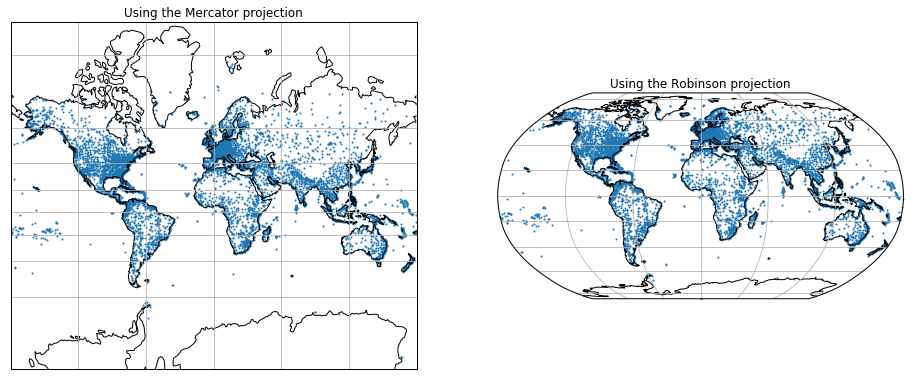

In [8]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(1,2,1, projection=ccrs.Mercator())
ax1.coastlines()
ax1.gridlines()
ax1.set_title('Using the Mercator projection')

ax2 = fig.add_subplot(1,2,2, projection=ccrs.Robinson())
ax2.coastlines()
ax2.gridlines()
ax2.set_title('Using the Robinson projection')

ax1.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=1)
ax2.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=1)
plt.show()

## 8.2 Adjusing the map extent to focus on a specific area

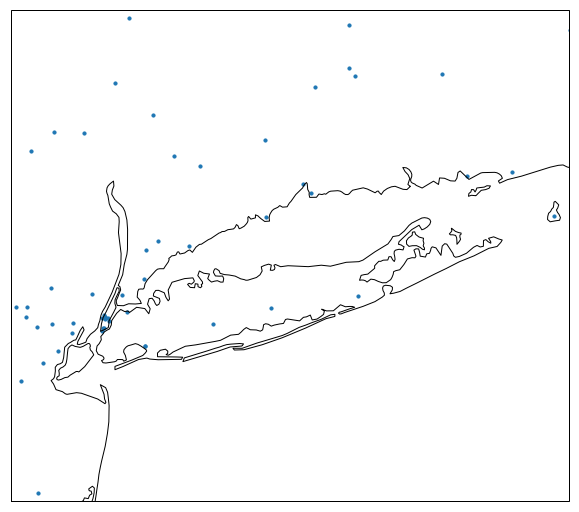

In [9]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.Mercator()})
ax.coastlines(resolution='10m')
ax.set_extent((-74.5,-71.5,40,42))
plt.scatter(airports["longitude"], airports["latitude"], transform=ccrs.Geodetic(), s=10)
plt.show()

## 9. Introduction to Great Circles

In [10]:
geo_routes = pd.read_csv('geo_routes.csv')
print(geo_routes.info())
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


No changes

## 10. Displaying Great Circles

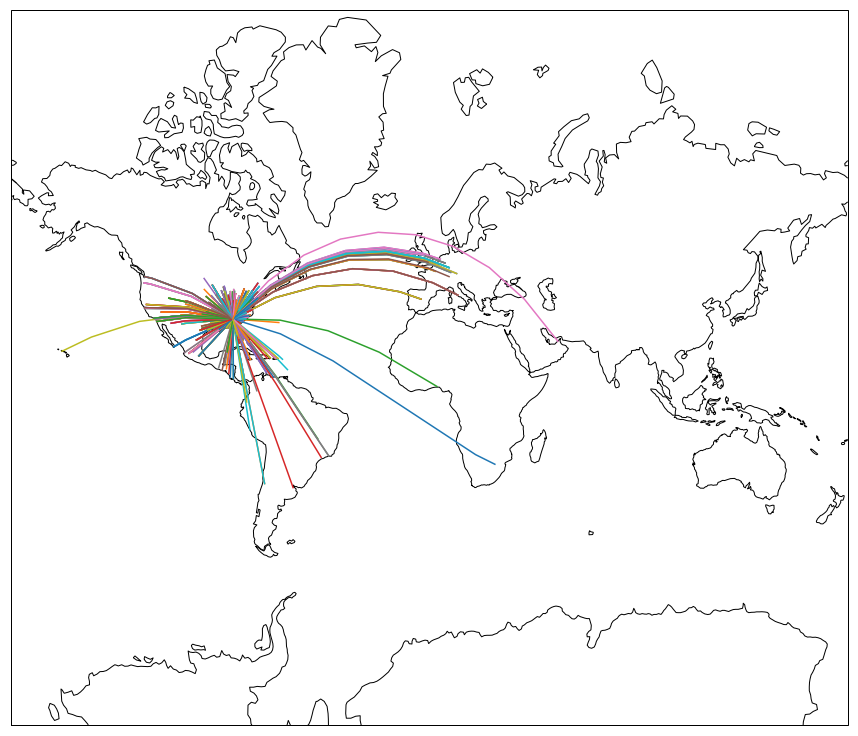

In [11]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'projection': ccrs.Mercator()})
ax.coastlines()
ax.set_global()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                ax.plot([start_lon, end_lon], [start_lat,end_lat], transform=ccrs.Geodetic())

atl = geo_routes[geo_routes['source'] == "ATL"]
create_great_circles(atl)
plt.show()

`ax.set_global()` sets the extent to the entire globe.